In [1]:
%%bash
# pip3 install pyclustering
# which jupyter
# which jupyter-notebook
# which conda
# conda install -U scikit-learn scipy matplotlib
# conda config --add channels conda-forge
# conda config --set channel_priority strict
# conda install pyclustering

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from sklearn_extra.cluster import KMedoids
import time

%matplotlib inline

In [3]:
df = pd.read_csv('rawdata1K.dat', delim_whitespace=True)
df.columns = ["X", "Y"]

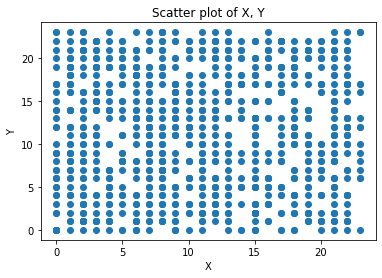

In [4]:
plt.scatter(df.X, df.Y)
plt.title('Scatter plot of X, Y')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('images/scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Find kMeans
# For capturing the execution time 
k_means = KMeans(n_clusters=3)
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster

In [6]:
# Visualize cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

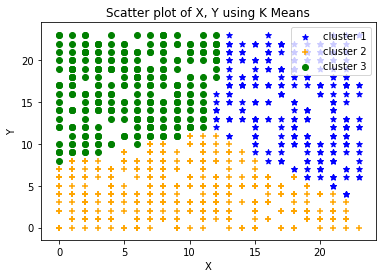

In [7]:
plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of X, Y using K Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


plt.savefig('images/scatter-plot-kmeans.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Scale data
scaler = MinMaxScaler()
df.X = scaler.fit(df[['X']]).transform(df[['X']])
df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])

In [9]:
# Retrain or recompute cluster
start = time.time()
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster
end = time.time()
print(end-start)

0.06407308578491211


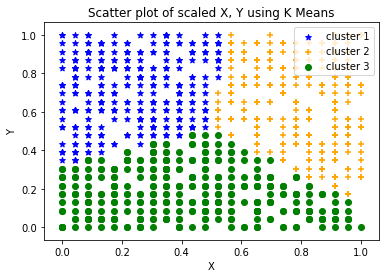

In [10]:
# plot it
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-kmeans-scaled.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
# Elbow plot method - find best k value
# For capturing the execution time 
start = time.time()
k_list = range(1, 10)
sse = []

for k in k_list:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['X', 'Y']])
    sse.append(k_means.inertia_)
    
end= time.time()
print(end - start)

0.5105836391448975


In [12]:
sse

[175.9784616491963,
 108.09491041374352,
 68.26564191510126,
 42.864112688075636,
 35.92322315111453,
 29.713835424157345,
 25.32068084871762,
 21.447696466410978,
 18.606670231891385]

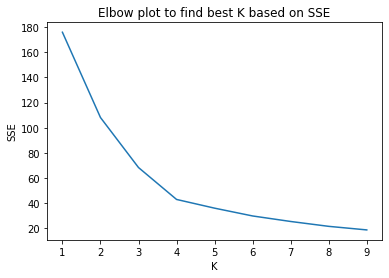

In [13]:
plt.title('Elbow plot to find best K based on SSE')

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_list, sse)

plt.savefig('images/elbow-kmeans-scaled.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# K Medoids from pyclustering
start = time.time()

sample = df.values.tolist() # read_sample('./rawdata10K.dat')
k_medoids_instance = kmedoids(sample, [12, 16, 17])


k_medoids_instance.process()
clusters = k_medoids_instance.get_clusters()
medoids = k_medoids_instance.get_medoids()
end = time.time()

print(end-start)

print(medoids)


0.045862674713134766
[941, 883, 61]


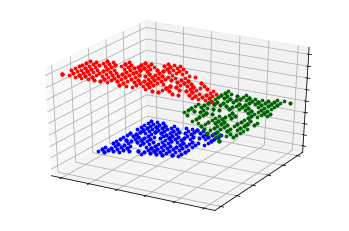

In [ ]:
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [ ]:
# Visualize medoids using plot

df1 = df[df.index.isin(clusters[0])]
df2 = df[df.index.isin(clusters[1])]
df3 = df[df.index.isin(clusters[2])]

#df1.columns = ["Age", "Income"]                                           
#df2.columns = ["Age", "Income"]
#df3.columns = ["Age", "Income"]


In [ ]:
plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Medoids - lib:pyclustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-kmedoids-scaled.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Using kmedoids from sklearn-extra
/
"""
xx = df[['X', 'Y']].values.tolist()
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(xx)
df['cluster'] = kmedoids.labels_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Medoids - lib : sklearn-extra')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
"""
/